In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)
    
    
data = pd.read_csv('data.csv', header=None)
x = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
def sigmoid(x):
    """
    sigmoid 计算
    s(x) = 1/ (1 + e^-x)
    """
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    """
    拟合函数
    x : 特征
    w : 权重
    b : 偏移
    y = s(Wx) + b
    """
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    """
    错误率计算公式
    y : 预测值
    f : output_formula
    error = -ylog(f)-(1-y)log(1-f)
    """
    return np.dot(-y, np.log(output)) - np.dot((1 - y), np.log(1-output))
#     return -y * np.log(f) - (1 - y) * np.log(1 - f)

def update_weights(x, y, weights, bias, learnrate=0.1):
    """
    更新权重
    """
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

In [15]:
def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()



========== Epoch 0 ==========
Train loss:  77.65464316312598
Accuracy:  0.46

========== Epoch 100 ==========
Train loss:  32.9530629518973
Accuracy:  0.93

========== Epoch 200 ==========
Train loss:  24.70240149741015
Accuracy:  0.94

========== Epoch 300 ==========
Train loss:  21.267947006451784
Accuracy:  0.94

========== Epoch 400 ==========
Train loss:  19.37644896528783
Accuracy:  0.93

========== Epoch 500 ==========
Train loss:  18.176750662425853
Accuracy:  0.93

========== Epoch 600 ==========
Train loss:  17.348181062368663
Accuracy:  0.91

========== Epoch 700 ==========
Train loss:  16.742333684724812
Accuracy:  0.91

========== Epoch 800 ==========
Train loss:  16.280834874867104
Accuracy:  0.91

========== Epoch 900 ==========
Train loss:  15.91829263959846
Accuracy:  0.92


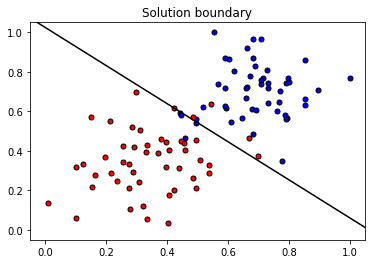

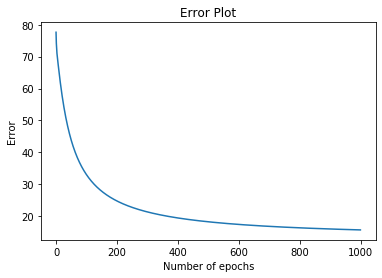

In [18]:
train(x, y, epochs=1000, learnrate=0.01)

In [23]:
sigmoid(np.array([2]))

array([0.88079708])